# **Project Name**    - AIRBNB Visualization



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name              -** K. Abhinay

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Loading

In [ ]:
# Load  Chicago Dataset
chicago=pd.read_csv("chicago_listings.csv")
chicago.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2384,https://www.airbnb.com/rooms/2384,20250311200238,2025-03-15,city scrape,Hyde Park - Walk to University of Chicago,Solo Hyde Park visitors are invited stay in th...,The apartment is less than one block from beau...,https://a0.muscache.com/pictures/hosting/Hosti...,2613,...,4.98,4.95,4.94,R17000015609,f,1,0,1,0,2.02
1,7126,https://www.airbnb.com/rooms/7126,20250311200238,2025-03-12,city scrape,Tiny Studio Apartment 94 Walk Score,A very small studio in a wonderful neighborhood.,"Ukrainian Village was just named ""Hottest Neig...",https://a0.muscache.com/pictures/51073/16c81c7...,17928,...,4.88,4.90,4.76,R24000114046,f,1,1,0,0,2.98
2,10945,https://www.airbnb.com/rooms/10945,20250311200238,2025-03-13,city scrape,The Biddle House (#1),Beautiful first floor apartment in Historic Ol...,NaN,https://a0.muscache.com/pictures/58d1a420-a24b...,33004,...,4.87,4.97,4.72,2209984,t,6,6,0,0,0.88
3,28749,https://www.airbnb.com/rooms/28749,20250311200238,2025-03-14,city scrape,Quirky Bucktown Loft w/ Parking No Parties,Located on a peaceful treelined street in ener...,Bucktown is a thriving community on the Northw...,https://a0.muscache.com/pictures/95884ff6-a672...,27506,...,4.88,4.93,4.72,R24000113825,f,1,1,0,0,1.40
4,71930,https://www.airbnb.com/rooms/71930,20250311200238,2025-03-13,city scrape,"Rest, Relax and Explore",A peaceful shared space in Chicago's Ukrainian...,Ukrainian Village / West Town is a beautifully...,https://a0.muscache.com/pictures/e881bea8-a003...,334241,...,4.95,4.84,4.84,R23000108832,f,1,0,1,0,0.77


In [3]:
chicago.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [ ]:
# Extracting important features for Visualization
features=[
    'neighbourhood_cleansed',
    'price',
    'id',
    'property_type',
    'room_type',
    'latitude',
    'longitude',
    'review_scores_rating',
    'number_of_reviews',
    'host_is_superhost',
    'host_identity_verified',
    'host_has_profile_pic',
    'host_listings_count'
]

In [5]:
chicago = chicago[features]

In [6]:
chicago.head()

,neighbourhood_cleansed,price,id,property_type,room_type,latitude,longitude,review_scores_rating,number_of_reviews,host_is_superhost,host_identity_verified,host_has_profile_pic,host_listings_count
0,Hyde Park,$125.00,2384,Private room in condo,Private room,41.78790,-87.58780,4.99,250,f,t,t,1
1,West Town,$81.00,7126,Entire rental unit,Entire home/apt,41.90166,-87.68021,4.72,569,t,t,t,1
2,Lincoln Park,$187.00,10945,Entire rental unit,Entire home/apt,41.91196,-87.63981,4.72,117,t,t,t,9
3,Logan Square,$196.00,28749,Entire loft,Entire home/apt,41.91955,-87.70069,4.82,244,t,t,t,1
4,West Town,$76.00,71930,Private room in rental unit,Private room,41.89615,-87.67934,4.89,129,t,f,t,1


In [ ]:
chicago['host_is_superhost']=chicago['host_is_superhost'].map({'t':1,'f':0}) # Converting into 0 and 1
chicago['host_identity_verified']=chicago['host_identity_verified'].map({'t':1,'f':0})
chicago['host_has_profile_pic']=chicago['host_has_profile_pic'].map({'t':1,'f':0})

In [8]:
chicago.head()

,neighbourhood_cleansed,price,id,property_type,room_type,latitude,longitude,review_scores_rating,number_of_reviews,host_is_superhost,host_identity_verified,host_has_profile_pic,host_listings_count
0,Hyde Park,$125.00,2384,Private room in condo,Private room,41.78790,-87.58780,4.99,250,0.0,1,1,1
1,West Town,$81.00,7126,Entire rental unit,Entire home/apt,41.90166,-87.68021,4.72,569,1.0,1,1,1
2,Lincoln Park,$187.00,10945,Entire rental unit,Entire home/apt,41.91196,-87.63981,4.72,117,1.0,1,1,9
3,Logan Square,$196.00,28749,Entire loft,Entire home/apt,41.91955,-87.70069,4.82,244,1.0,1,1,1
4,West Town,$76.00,71930,Private room in rental unit,Private room,41.89615,-87.67934,4.89,129,1.0,0,1,1


In [ ]:
# Checking for missing values
chicago.isna().sum()

neighbourhood_cleansed       0
price                     1030
id                           0
property_type                0
room_type                    0
latitude                     0
longitude                    0
review_scores_rating      1878
number_of_reviews            0
host_is_superhost          198
host_identity_verified       0
host_has_profile_pic         0
host_listings_count          0
dtype: int64

In [10]:
chicago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8748 entries, 0 to 8747
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  8748 non-null   object 
 1   price                   7718 non-null   object 
 2   id                      8748 non-null   int64  
 3   property_type           8748 non-null   object 
 4   room_type               8748 non-null   object 
 5   latitude                8748 non-null   float64
 6   longitude               8748 non-null   float64
 7   review_scores_rating    6870 non-null   float64
 8   number_of_reviews       8748 non-null   int64  
 9   host_is_superhost       8550 non-null   float64
 10  host_identity_verified  8748 non-null   int64  
 11  host_has_profile_pic    8748 non-null   int64  
 12  host_listings_count     8748 non-null   int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 888.6+ KB


In [ ]:
# Function to convert price to float
# The price column contains dollar signs and commas, which need to be removed before conversion
def conv(x):
    try:
        return float(x.replace('$','').replace(',',''))
    except:
        return x
chicago['price']=chicago['price'].map(conv)

In [12]:
chicago.head()

,neighbourhood_cleansed,price,id,property_type,room_type,latitude,longitude,review_scores_rating,number_of_reviews,host_is_superhost,host_identity_verified,host_has_profile_pic,host_listings_count
0,Hyde Park,125.0,2384,Private room in condo,Private room,41.78790,-87.58780,4.99,250,0.0,1,1,1
1,West Town,81.0,7126,Entire rental unit,Entire home/apt,41.90166,-87.68021,4.72,569,1.0,1,1,1
2,Lincoln Park,187.0,10945,Entire rental unit,Entire home/apt,41.91196,-87.63981,4.72,117,1.0,1,1,9
3,Logan Square,196.0,28749,Entire loft,Entire home/apt,41.91955,-87.70069,4.82,244,1.0,1,1,1
4,West Town,76.0,71930,Private room in rental unit,Private room,41.89615,-87.67934,4.89,129,1.0,0,1,1


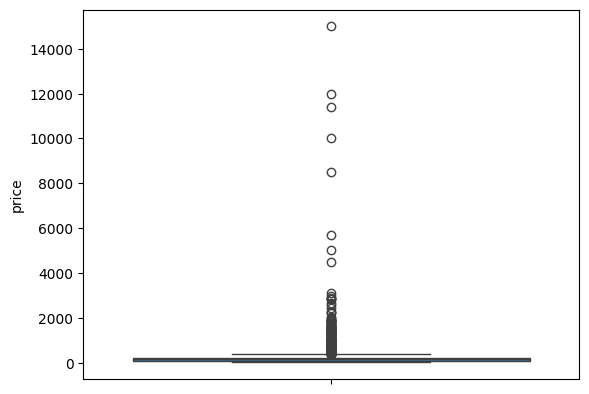

In [ ]:
# checking for outliers for filling null values in numerical columns
sns.boxplot(y=chicago['price'],whis=1.5)
plt.show()

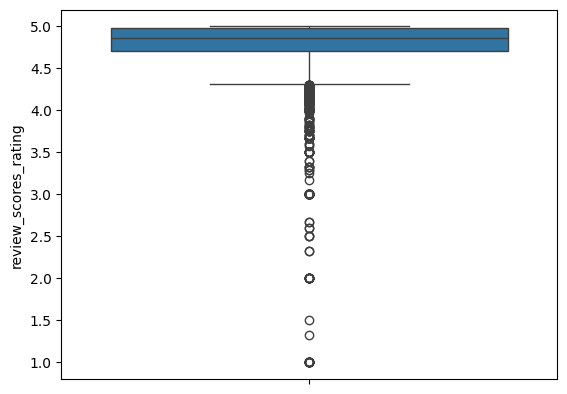

In [14]:
sns.boxplot(y=chicago['review_scores_rating'],whis=1.5)
plt.show()

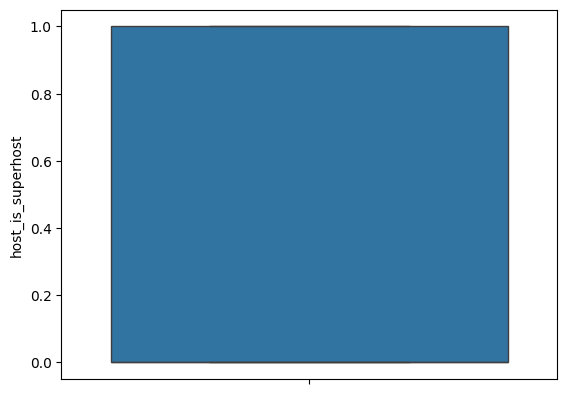

In [15]:
sns.boxplot(y=chicago['host_is_superhost'],whis=1.5)
plt.show()

In [ ]:
# Filling missing values
for x in ['price','review_scores_rating']:
    chicago[x]=chicago[x].fillna(chicago[x].median())

chicago['host_is_superhost']=chicago['host_is_superhost'].fillna(chicago['host_is_superhost'].mode()[0])

In [17]:
chicago.head()

,neighbourhood_cleansed,price,id,property_type,room_type,latitude,longitude,review_scores_rating,number_of_reviews,host_is_superhost,host_identity_verified,host_has_profile_pic,host_listings_count
0,Hyde Park,125.0,2384,Private room in condo,Private room,41.78790,-87.58780,4.99,250,0.0,1,1,1
1,West Town,81.0,7126,Entire rental unit,Entire home/apt,41.90166,-87.68021,4.72,569,1.0,1,1,1
2,Lincoln Park,187.0,10945,Entire rental unit,Entire home/apt,41.91196,-87.63981,4.72,117,1.0,1,1,9
3,Logan Square,196.0,28749,Entire loft,Entire home/apt,41.91955,-87.70069,4.82,244,1.0,1,1,1
4,West Town,76.0,71930,Private room in rental unit,Private room,41.89615,-87.67934,4.89,129,1.0,0,1,1


In [ ]:
# Converting boolean columns to numerical
chicago['host_is_superhost']=chicago['host_is_superhost'].astype(int)
chicago.head()

,neighbourhood_cleansed,price,id,property_type,room_type,latitude,longitude,review_scores_rating,number_of_reviews,host_is_superhost,host_identity_verified,host_has_profile_pic,host_listings_count
0,Hyde Park,125.0,2384,Private room in condo,Private room,41.78790,-87.58780,4.99,250,0,1,1,1
1,West Town,81.0,7126,Entire rental unit,Entire home/apt,41.90166,-87.68021,4.72,569,1,1,1,1
2,Lincoln Park,187.0,10945,Entire rental unit,Entire home/apt,41.91196,-87.63981,4.72,117,1,1,1,9
3,Logan Square,196.0,28749,Entire loft,Entire home/apt,41.91955,-87.70069,4.82,244,1,1,1,1
4,West Town,76.0,71930,Private room in rental unit,Private room,41.89615,-87.67934,4.89,129,1,0,1,1


In [ ]:
# Adding a new column for country for easily identifying the dataset
chicago['country']=['chicago']*len(chicago)
chicago.head()

,neighbourhood_cleansed,price,id,property_type,room_type,latitude,longitude,review_scores_rating,number_of_reviews,host_is_superhost,host_identity_verified,host_has_profile_pic,host_listings_count,country
0,Hyde Park,125.0,2384,Private room in condo,Private room,41.78790,-87.58780,4.99,250,0,1,1,1,chicago
1,West Town,81.0,7126,Entire rental unit,Entire home/apt,41.90166,-87.68021,4.72,569,1,1,1,1,chicago
2,Lincoln Park,187.0,10945,Entire rental unit,Entire home/apt,41.91196,-87.63981,4.72,117,1,1,1,9,chicago
3,Logan Square,196.0,28749,Entire loft,Entire home/apt,41.91955,-87.70069,4.82,244,1,1,1,1,chicago
4,West Town,76.0,71930,Private room in rental unit,Private room,41.89615,-87.67934,4.89,129,1,0,1,1,chicago


In [ ]:
#Checking for duplicates
chicago[chicago.duplicated()]

,neighbourhood_cleansed,price,id,property_type,room_type,latitude,longitude,review_scores_rating,number_of_reviews,host_is_superhost,host_identity_verified,host_has_profile_pic,host_listings_count,country


In [ ]:
#chicago.to_csv('chicago_cleaned.csv',index=False)

In [ ]:
# Loading New Orleans Dataset
new_orleans=pd.read_csv("new_orleans_listings.csv")
new_orleans.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,19091.0,https://www.airbnb.com/rooms/19091,2.025030e+13,3/2/2025,city scrape,Fully Furnished Cozy Apartment,This cozy space is a wonder of post-Katrina re...,"NorthWest Carrollton, where this apartment is ...",https://a0.muscache.com/pictures/a5fdfd3b-5d81...,72880,...,4.98,4.68,4.91,"22-RSTR-14107, 22-OSTR-14105",f,1,1,0,0,2.78
1,71624.0,https://www.airbnb.com/rooms/71624,2.025030e+13,3/3/2025,city scrape,Ravenwood Manor (Historic Bywater),You are in for a very unique stay in a neighbo...,"Ours is a neighborhood made up of artists, mus...",https://a0.muscache.com/pictures/37488608/8cc1...,367223,...,4.98,4.84,4.89,"21-RSTR-18609, 22-OSTR-20720",f,1,1,0,0,1.83
2,74498.0,https://www.airbnb.com/rooms/74498,2.025030e+13,3/3/2025,city scrape,Maison Marais 1,Maison Marais 1 is a stylish one-bedroom apart...,"This is a vibrant, diverse neighborhood of mos...",https://a0.muscache.com/pictures/73591836/a1f5...,391462,...,4.96,4.67,4.86,23-XSTR-13082,f,3,3,0,0,3.82
3,79536.0,https://www.airbnb.com/rooms/79536,2.025030e+13,3/3/2025,city scrape,FeelAtHomeInNewOrleans-PrivateApt,"Safe, clean & functional! Front porch and gate...","I love that it's down to earth, welcoming, his...",https://a0.muscache.com/pictures/f1037ebf-1573...,428362,...,4.98,4.54,4.87,"23-NSTR-15067, 24-OSTR-20882",t,1,1,0,0,4.56
4,79609.0,https://www.airbnb.com/rooms/79609,2.025030e+13,3/3/2025,city scrape,Bywater's Original & Finest,The Art of Hospitality,"First settled in 1806, Bywater is known for it...",https://a0.muscache.com/pictures/5c5da2eb-7434...,428909,...,4.99,4.84,4.94,"23-ISTR-02823, 23-OSTR-02823",f,1,1,0,0,2.97


In [ ]:
#Subsetting the features for New Orleans dataset
new_orleans=new_orleans[features]
new_orleans.head()

,neighbourhood_cleansed,price,id,property_type,room_type,latitude,longitude,review_scores_rating,number_of_reviews,host_is_superhost,host_identity_verified,host_has_profile_pic,host_listings_count
0,Leonidas,$61.00,19091.0,Entire rental unit,Entire home/apt,29.96100,-90.11950,4.89,503,f,t,t,1.0
1,Bywater,$167.00,71624.0,Entire rental unit,Entire home/apt,29.96153,-90.04364,4.94,313,t,f,t,1.0
2,St. Roch,$150.00,74498.0,Entire rental unit,Entire home/apt,29.96986,-90.05172,4.90,649,t,t,t,3.0
3,Seventh Ward,$179.00,79536.0,Entire rental unit,Entire home/apt,29.97803,-90.07450,4.89,768,t,t,t,1.0
4,St. Claude,$136.00,79609.0,Entire guest suite,Entire home/apt,29.96448,-90.03667,4.96,505,t,t,t,1.0


In [ ]:
# Converting boolean columns to numerical
new_orleans['host_has_profile_pic']=new_orleans['host_has_profile_pic'].map({'t':1,'f':0})
new_orleans['host_identity_verified']=new_orleans['host_identity_verified'].map({'t':1,'f':0})
new_orleans['host_is_superhost']=new_orleans['host_is_superhost'].map({'t':1,'f':0})
new_orleans.head()

,neighbourhood_cleansed,price,id,property_type,room_type,latitude,longitude,review_scores_rating,number_of_reviews,host_is_superhost,host_identity_verified,host_has_profile_pic,host_listings_count
0,Leonidas,$61.00,19091.0,Entire rental unit,Entire home/apt,29.96100,-90.11950,4.89,503,0.0,1.0,1.0,1.0
1,Bywater,$167.00,71624.0,Entire rental unit,Entire home/apt,29.96153,-90.04364,4.94,313,1.0,0.0,1.0,1.0
2,St. Roch,$150.00,74498.0,Entire rental unit,Entire home/apt,29.96986,-90.05172,4.90,649,1.0,1.0,1.0,3.0
3,Seventh Ward,$179.00,79536.0,Entire rental unit,Entire home/apt,29.97803,-90.07450,4.89,768,1.0,1.0,1.0,1.0
4,St. Claude,$136.00,79609.0,Entire guest suite,Entire home/apt,29.96448,-90.03667,4.96,505,1.0,1.0,1.0,1.0


In [ ]:
#Checking for duplicate values
new_orleans[new_orleans.duplicated()]

,neighbourhood_cleansed,price,id,property_type,room_type,latitude,longitude,review_scores_rating,number_of_reviews,host_is_superhost,host_identity_verified,host_has_profile_pic,host_listings_count
4363,Central Business District,$184.00,7.224760e+17,Entire condo,Entire home/apt,29.950932,-90.067855,NaN,0,0.0,1.0,1.0,1243.0
4364,Central Business District,$184.00,7.224760e+17,Entire condo,Entire home/apt,29.950932,-90.067855,NaN,0,0.0,1.0,1.0,1243.0
4366,Central Business District,$212.00,7.224770e+17,Entire condo,Entire home/apt,29.950932,-90.067855,NaN,0,0.0,1.0,1.0,1243.0
4368,Central Business District,$212.00,7.224770e+17,Entire condo,Entire home/apt,29.950932,-90.067855,NaN,0,0.0,1.0,1.0,1243.0
4369,Central Business District,$212.00,7.224770e+17,Entire condo,Entire home/apt,29.950932,-90.067855,NaN,0,0.0,1.0,1.0,1243.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7693,Central City,$206.00,1.348330e+18,Entire condo,Entire home/apt,29.939040,-90.075987,NaN,0,0.0,1.0,1.0,27.0
7694,Central City,$206.00,1.348330e+18,Entire condo,Entire home/apt,29.939040,-90.075987,NaN,0,0.0,1.0,1.0,27.0
7696,Central City,$206.00,1.348340e+18,Entire condo,Entire home/apt,29.939040,-90.075987,NaN,0,0.0,1.0,1.0,27.0
7698,Central City,$303.00,1.348360e+18,Entire condo,Entire home/apt,29.939040,-90.075987,NaN,0,0.0,1.0,1.0,27.0


In [ ]:
#Dropping duplicate values
new_orleans.drop_duplicates(inplace=True)
new_orleans.head()

,neighbourhood_cleansed,price,id,property_type,room_type,latitude,longitude,review_scores_rating,number_of_reviews,host_is_superhost,host_identity_verified,host_has_profile_pic,host_listings_count
0,Leonidas,$61.00,19091.0,Entire rental unit,Entire home/apt,29.96100,-90.11950,4.89,503,0.0,1.0,1.0,1.0
1,Bywater,$167.00,71624.0,Entire rental unit,Entire home/apt,29.96153,-90.04364,4.94,313,1.0,0.0,1.0,1.0
2,St. Roch,$150.00,74498.0,Entire rental unit,Entire home/apt,29.96986,-90.05172,4.90,649,1.0,1.0,1.0,3.0
3,Seventh Ward,$179.00,79536.0,Entire rental unit,Entire home/apt,29.97803,-90.07450,4.89,768,1.0,1.0,1.0,1.0
4,St. Claude,$136.00,79609.0,Entire guest suite,Entire home/apt,29.96448,-90.03667,4.96,505,1.0,1.0,1.0,1.0


In [ ]:
# Checking for missing values
new_orleans.isna().sum()

neighbourhood_cleansed       0
price                     1177
id                           0
property_type                0
room_type                    0
latitude                     0
longitude                    0
review_scores_rating      1261
number_of_reviews            0
host_is_superhost          234
host_identity_verified      14
host_has_profile_pic        14
host_listings_count         14
dtype: int64

In [ ]:
# Converting price into float
# The price column contains dollar signs and commas, which need to be removed before conversion
new_orleans['price']=new_orleans['price'].map(conv)
new_orleans.head()

,neighbourhood_cleansed,price,id,property_type,room_type,latitude,longitude,review_scores_rating,number_of_reviews,host_is_superhost,host_identity_verified,host_has_profile_pic,host_listings_count
0,Leonidas,61.0,19091.0,Entire rental unit,Entire home/apt,29.96100,-90.11950,4.89,503,0.0,1.0,1.0,1.0
1,Bywater,167.0,71624.0,Entire rental unit,Entire home/apt,29.96153,-90.04364,4.94,313,1.0,0.0,1.0,1.0
2,St. Roch,150.0,74498.0,Entire rental unit,Entire home/apt,29.96986,-90.05172,4.90,649,1.0,1.0,1.0,3.0
3,Seventh Ward,179.0,79536.0,Entire rental unit,Entire home/apt,29.97803,-90.07450,4.89,768,1.0,1.0,1.0,1.0
4,St. Claude,136.0,79609.0,Entire guest suite,Entire home/apt,29.96448,-90.03667,4.96,505,1.0,1.0,1.0,1.0


In [ ]:
# filling missing values in numerical columns
new_orleans['price']=new_orleans['price'].fillna(new_orleans['price'].median())
new_orleans['review_scores_rating']=new_orleans['review_scores_rating'].fillna(new_orleans['review_scores_rating'].median())
new_orleans['host_is_superhost']=new_orleans['host_is_superhost'].fillna(new_orleans['host_is_superhost'].mode()[0])
new_orleans['host_identity_verified']=new_orleans['host_identity_verified'].fillna(new_orleans['host_identity_verified'].mode()[0])
new_orleans['host_has_profile_pic']=new_orleans['host_has_profile_pic'].fillna(new_orleans['host_has_profile_pic'].mode()[0])

In [29]:
new_orleans['host_listings_count']=new_orleans['host_listings_count'].fillna(new_orleans['host_listings_count'].median())
new_orleans.isna().sum()

neighbourhood_cleansed    0
price                     0
id                        0
property_type             0
room_type                 0
latitude                  0
longitude                 0
review_scores_rating      0
number_of_reviews         0
host_is_superhost         0
host_identity_verified    0
host_has_profile_pic      0
host_listings_count       0
dtype: int64

In [ ]:
# Creating a new column for country for easily identifying the dataset
new_orleans['country']=['new orleans']*len(new_orleans)
new_orleans.head()

,neighbourhood_cleansed,price,id,property_type,room_type,latitude,longitude,review_scores_rating,number_of_reviews,host_is_superhost,host_identity_verified,host_has_profile_pic,host_listings_count,country
0,Leonidas,61.0,19091.0,Entire rental unit,Entire home/apt,29.96100,-90.11950,4.89,503,0.0,1.0,1.0,1.0,new orleans
1,Bywater,167.0,71624.0,Entire rental unit,Entire home/apt,29.96153,-90.04364,4.94,313,1.0,0.0,1.0,1.0,new orleans
2,St. Roch,150.0,74498.0,Entire rental unit,Entire home/apt,29.96986,-90.05172,4.90,649,1.0,1.0,1.0,3.0,new orleans
3,Seventh Ward,179.0,79536.0,Entire rental unit,Entire home/apt,29.97803,-90.07450,4.89,768,1.0,1.0,1.0,1.0,new orleans
4,St. Claude,136.0,79609.0,Entire guest suite,Entire home/apt,29.96448,-90.03667,4.96,505,1.0,1.0,1.0,1.0,new orleans


In [ ]:
# Concatenating the two datasets for Visualization
df=pd.concat([chicago,new_orleans],ignore_index=True)
df.head()

,neighbourhood_cleansed,price,id,property_type,room_type,latitude,longitude,review_scores_rating,number_of_reviews,host_is_superhost,host_identity_verified,host_has_profile_pic,host_listings_count,country
0,Hyde Park,125.0,2384.0,Private room in condo,Private room,41.78790,-87.58780,4.99,250,0.0,1.0,1.0,1.0,chicago
1,West Town,81.0,7126.0,Entire rental unit,Entire home/apt,41.90166,-87.68021,4.72,569,1.0,1.0,1.0,1.0,chicago
2,Lincoln Park,187.0,10945.0,Entire rental unit,Entire home/apt,41.91196,-87.63981,4.72,117,1.0,1.0,1.0,9.0,chicago
3,Logan Square,196.0,28749.0,Entire loft,Entire home/apt,41.91955,-87.70069,4.82,244,1.0,1.0,1.0,1.0,chicago
4,West Town,76.0,71930.0,Private room in rental unit,Private room,41.89615,-87.67934,4.89,129,1.0,0.0,1.0,1.0,chicago


In [32]:
df.shape

(16522, 14)

In [33]:
chicago.shape[0]+new_orleans.shape[0]==df.shape[0]

True

In [ ]:
# Exporting dataframe into CSV file
df.to_csv('cleaned_data.csv',index=False)

## ***Data Manipulations Done***

1. **Feature Extraction**
2. **Convering columns into respective Datatypes**
3. **Filling Missing Values**
4. **Creating new column for country for easier identification of Dataset.**
5. **Merging both countries dataframe into a single dataframe and exporting it into csv file.**